In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import getdist
from getdist import plots, MCSamples

ca48 = np.loadtxt("MCMC_FSUGOLD_XEFT_48Ca.txt")
pb208 = np.loadtxt("MCMC_FSUGOLD_XEFT_208Pb.txt")

print('48Ca')
print('Charge Radius = ' + str(statistics.mean(ca48[:,3])))
print('Weak Radius = ' + str(statistics.mean(ca48[:,4])))

print('208Pb')
print('Charge Radius = ' + str(statistics.mean(pb208[:,3])))
print('Weak Radius = ' + str(statistics.mean(pb208[:,4])))


48Ca
Charge Radius = 3.4810165
Weak Radius = 3.72676404
208Pb
Charge Radius = 5.52414827
Weak Radius = 5.74996835


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


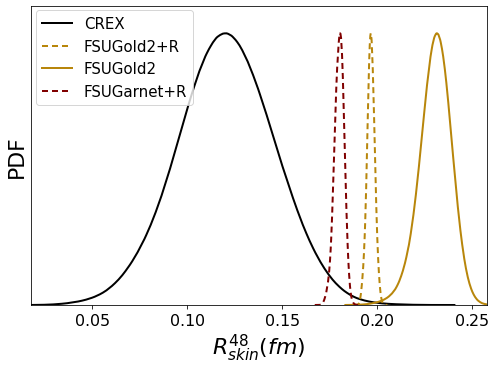

In [3]:
ca48m = np.loadtxt("MCMC_FSUGOLD_XEFT_48Ca.txt")
ca48m_gar = np.loadtxt("MCMC_FSUGARNET_XEFT_48Ca.txt")
ca48p = np.loadtxt("FSUGold2R-Radii-Ca.txt")
ca48o = np.loadtxt("FSUGold2-Radii-Ca.txt")[:,3]

ca48p_np = ca48p[:,[0,3]]
ca48m_np = ca48m[:,[0,5]]
ca48m_gar_np = ca48m_gar[:,[5]]
ca48_np = np.append(ca48p_np,ca48m_np,0)

ca48_np = ca48_np[:,1]

# Get a sample of the CREX exp
ndim = 1
nsamp = 10000
random_state = np.random.default_rng(10) # seed random generator
cov = [[0.026**2]]
crex = random_state.multivariate_normal([0.121], cov, size=nsamp)

names = ['Nskin']
labels = [r'R_{skin}^{48} (fm)']
samp_crex = MCSamples(samples=crex,names = names, labels = labels,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})
samp_ca48_gar = MCSamples(samples=ca48m_gar_np,names = names, labels=labels,settings={'smooth_scale_1D':0.5})
samp_ca48 = MCSamples(samples=ca48_np,names = names, labels=labels,settings={'smooth_scale_1D':0.5})
samp_ca48_o = MCSamples(samples=ca48o,names = names, labels=labels,settings={'smooth_scale_1D':0.9})

colorsett = ['black','darkgoldenrod','darkgoldenrod','maroon']
linestyle = ['-','--','-','--']
linesize = [2,2,2,2]

f = plots.get_single_plotter(width_inch=7)
f.settings.axes_fontsize = 16
f.settings.axes_labelsize = 22
f.plot_1d([samp_crex,samp_ca48,samp_ca48_o,samp_ca48_gar],'Nskin',colors=colorsett,ls=linestyle,lws=linesize,normalized=False)
f.add_legend(legend_labels=['CREX','FSUGold2+R','FSUGold2','FSUGarnet+R'], legend_ncol=1,legend_loc=[0.01,0.67],fontsize=15)
f._tight_layout()
f.export('1D_Ca48_Nskin.png',transparent=False,facecolor='white', pad_inches=0.1,bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


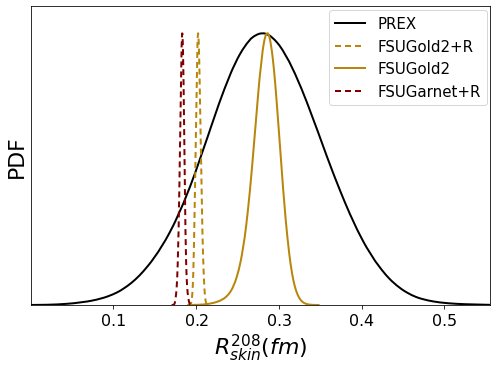

In [2]:
pb208m = np.loadtxt("MCMC_FSUGOLD_XEFT_208Pb.txt")
pb208m_gar = np.loadtxt("MCMC_FSUGARNET_XEFT_208Pb.txt")
pb208p = np.loadtxt("FSUGold2R-Radii-Pb.txt")
pb208o = np.loadtxt("FSUGold2-Radii-Pb.txt")[:,3]
pb208p_np = pb208p[:,[0,3]]
pb208m_np = pb208m[:,[0,5]]
pb208m_garn_np = pb208m_gar[:,[5]]
pb208_np = np.append(pb208p_np,pb208m_np,0)

pb208_np = pb208_np[:,1]

# Get a sample of the PREX exp
ndim = 1
nsamp = 10000
random_state = np.random.default_rng(10) # seed random generator
cov = [[0.071**2]]
prex = random_state.multivariate_normal([0.283], cov, size=nsamp)

names = ['Nskin']
labels = [r'R_{skin}^{208} (fm)']
samp_prex = MCSamples(samples=prex,names = names, labels = labels,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})
samp_pb208 = MCSamples(samples=pb208_np,names = names, labels=labels,settings={'smooth_scale_1D':0.5})
samp_pb208_gar = MCSamples(samples=pb208m_garn_np,names = names, labels=labels,settings={'smooth_scale_1D':0.5})
samp_pb208_o = MCSamples(samples=pb208o,names = names, labels=labels,settings={'smooth_scale_1D':0.9})

colorsett = ['black','darkgoldenrod','darkgoldenrod','maroon']
linestyle = ['-','--','-','--']
linesize = [2,2,2]

f = plots.get_single_plotter(width_inch=7)
f.settings.axes_fontsize = 16
f.settings.axes_labelsize = 22
f.plot_1d([samp_prex,samp_pb208,samp_pb208_o,samp_pb208_gar],'Nskin',colors=colorsett,ls=linestyle,lws=linesize,normalized=False)
f.add_legend(legend_labels=['PREX','FSUGold2+R','FSUGold2','FSUGarnet+R'], legend_ncol=1,legend_loc=[0.65,0.67],fontsize=15)
f._tight_layout()
f.export('1D_Pb208_Nskin.png',transparent=False,facecolor='white', pad_inches=0.1,bbox_inches='tight')

Removed no burn in


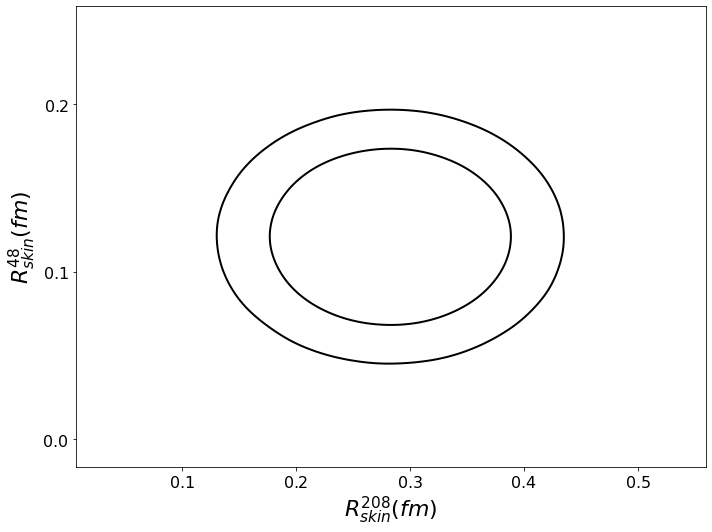

In [5]:
import numpy as np
from getdist import plots, MCSamples

# Get a sample of the CREX exp
ndim = 2
nsamp = 10000000
cov = [[0.0353**2,0],[0,0.071**2]]#[[0.0354**2,0],[0,0.071**2]]
mean = [0.121,0.283]
exp = np.random.multivariate_normal(mean, cov, size=nsamp)

names = ['Nskin48','Nskin208']
labels = [r'R_{skin}^{48} (fm)',r'R_{skin}^{208} (fm)']
samp_exp = MCSamples(samples=exp,names = names, labels = labels)
samp_exp.updateSettings({'contours': [0.67, 0.90]})

colorsett = ['black','darkgoldenrod','darkgoldenrod']
linestyle = ['-','-','--']
linesize = [2,2,2]

f = plots.get_single_plotter(width_inch=10)
f.settings.axes_fontsize = 16
f.settings.axes_labelsize = 22
f.plot_2d([samp_exp],['Nskin208','Nskin48'],colors=colorsett,ls=linestyle,lws=linesize)

#f.add_legend(legend_labels=['CREX/PREX','FSUGold2','FSUGold2+R'], legend_ncol=1,legend_loc=[0.01,0.79])
f.export('2D_Ca_Pb_Nskin.png',transparent=False,facecolor='white', pad_inches=0.1,bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in


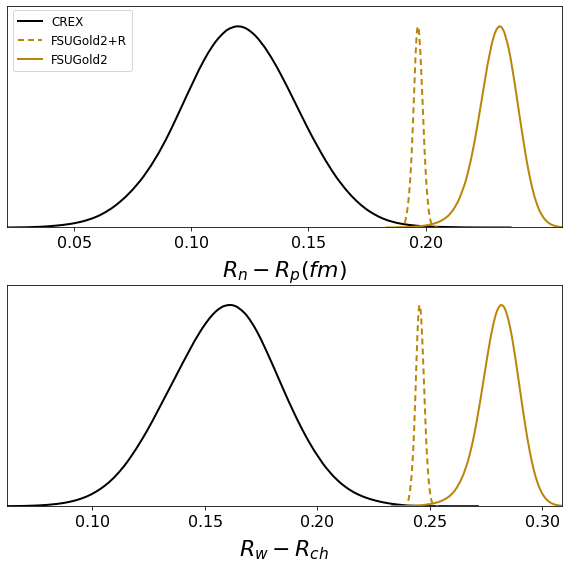

In [40]:
ca48m = np.loadtxt("MCMC_FSUGOLD_XEFT_48Ca.txt")[:,[5,6]]
ca48m[:,1] = -ca48m[:,1]
ca48p = np.loadtxt("FSUGold2R-Radii-Ca.txt")[:,[3,9]]

ca48o = np.loadtxt("FSUGold2-Radii-Ca.txt")[:,[3,9]]
ca48 = np.append(ca48p,ca48m,0)

# Get a sample of the CREX exp
ndim = 1
nsamp = 10000
random_state = np.random.default_rng(10) # seed random generator
cov = [[0.025**2]]
crex_np = random_state.multivariate_normal([0.121], cov, size=nsamp)
cov = [[0.0245**2]]
crex_cw = random_state.multivariate_normal([0.159], cov, size=nsamp)
crex = np.append(crex_np,crex_cw,1)

names = ['Nskin','CW']
labels = [r'R_n - R_p (fm)','R_w - R_{ch}']
samp_crex = MCSamples(samples=crex,names = names, labels = labels,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})
samp_ca48 = MCSamples(samples=ca48,names = names, labels=labels,settings={'smooth_scale_1D':0.5})
samp_ca48_o = MCSamples(samples=ca48o,names = names, labels=labels,settings={'smooth_scale_1D':0.9})

colorsett = ['black','darkgoldenrod','darkgoldenrod']
linestyle = ['-','--','-']
linesize = [2,2,2]

f = plots.get_subplot_plotter(subplot_size_ratio=0.5,width_inch=8)
f.settings.axes_fontsize = 16
f.settings.axes_labelsize = 22
f.make_figure(nplot=2,nx=0,ny=2,sharex=True,sharey=True)
f.plot_1d([samp_crex,samp_ca48,samp_ca48_o],'Nskin',ax=0,colors=colorsett,ls=linestyle,lws=linesize,normalized=False)
f.plot_1d([samp_crex,samp_ca48,samp_ca48_o],'CW',ax=1,colors=colorsett,ls=linestyle,lws=linesize,normalized=False)
f.add_legend(legend_labels=['CREX','FSUGold2+R','FSUGold2'], ax=0,legend_ncol=1,legend_loc=[0.01,0.71])
f._tight_layout()
f.export('1D_Ca48_Nskin_CW.png',transparent=False,facecolor='white', pad_inches=0.1,bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


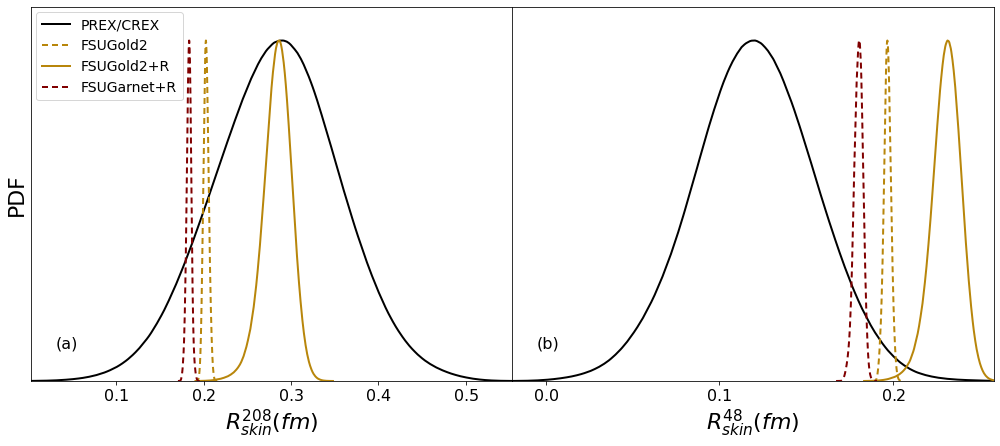

In [3]:
ca48m = np.loadtxt("MCMC_FSUGOLD_XEFT_48Ca.txt")
ca48m_gar = np.loadtxt("MCMC_FSUGARNET_XEFT_48Ca.txt")
ca48p = np.loadtxt("FSUGold2R-Radii-Ca.txt")
ca48o = np.loadtxt("FSUGold2-Radii-Ca.txt")[:,3]
pb208m = np.loadtxt("MCMC_FSUGOLD_XEFT_208Pb.txt")
pb208m_gar = np.loadtxt("MCMC_FSUGARNET_XEFT_208Pb.txt")
pb208p = np.loadtxt("FSUGold2R-Radii-Pb.txt")
pb208o = np.loadtxt("FSUGold2-Radii-Pb.txt")[:,3]

ca48p_np = ca48p[:,[0,3]]
ca48m_np = ca48m[:,[0,5]]
ca48m_gar_np = ca48m_gar[:,[5]]
ca48_np = np.append(ca48p_np,ca48m_np,0)

pb208p_np = pb208p[:,[0,3]]
pb208m_np = pb208m[:,[0,5]]
pb208m_garn_np = pb208m_gar[:,[5]]
pb208_np = np.append(pb208p_np,pb208m_np,0)

ca48_np = ca48_np[:,1]
pb208_np = pb208_np[:,1]

# Get a sample of the CREX exp
ndim = 1
nsamp = 10000
random_state = np.random.default_rng(10) # seed random generator
cov = [[0.0353**2]]
crex = random_state.multivariate_normal([0.121], cov, size=nsamp)
cov = [[0.071**2]]
prex = random_state.multivariate_normal([0.283], cov, size=nsamp)

names = ['Nskin']
labels_ca = [r'R_{skin}^{48} (fm)']
labels_pb = [r'R_{skin}^{208} (fm)']
samp_crex = MCSamples(samples=crex,names = names, labels = labels_ca,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})
samp_ca48_gar = MCSamples(samples=ca48m_gar_np,names = names, labels=labels_ca,settings={'smooth_scale_1D':0.5})
samp_ca48 = MCSamples(samples=ca48_np,names = names, labels=labels_ca,settings={'smooth_scale_1D':0.5})
samp_ca48_o = MCSamples(samples=ca48o,names = names, labels=labels_ca,settings={'smooth_scale_1D':0.9})
samp_prex = MCSamples(samples=prex,names = names, labels = labels_pb,settings={'smooth_scale_2D':0.9,'fine_bins_2D':100})
samp_pb208 = MCSamples(samples=pb208_np,names = names, labels=labels_pb,settings={'smooth_scale_1D':0.5})
samp_pb208_gar = MCSamples(samples=pb208m_garn_np,names = names, labels=labels_pb,settings={'smooth_scale_1D':0.5})
samp_pb208_o = MCSamples(samples=pb208o,names = names, labels=labels_pb,settings={'smooth_scale_1D':0.9})


colorsett = ['black','darkgoldenrod','darkgoldenrod','maroon']
linestyle = ['-','--','-','--']
linesize = [2,2,2,2]

f = plots.get_subplot_plotter(subplot_size_ratio=0.9,width_inch=14)
f.settings.axes_fontsize = 16
f.settings.axes_labelsize = 22
f.make_figure(nplot=2,nx=2,ny=0,sharex=True,sharey=True)
f.plot_1d([samp_prex,samp_pb208,samp_pb208_o,samp_pb208_gar],'Nskin',ax=0,colors=colorsett,ls=linestyle,lws=linesize,normalized=False)
f.plot_1d([samp_crex,samp_ca48,samp_ca48_o,samp_ca48_gar],'Nskin',ax=1,colors=colorsett,ls=linestyle,lws=linesize,normalized=False,no_ylabel=True)
f.add_legend(legend_labels=['PREX/CREX','FSUGold2','FSUGold2+R','FSUGarnet+R'], legend_ncol=1,legend_loc=[-0.99,0.75],fontsize=14)
#f._tight_layout()
f.add_text('(a)',-0.95,0.1,fontsize=16)
f.add_text('(b)',0.05,0.1,fontsize=16)
f.export('1D_Ca48_Pb208.png',transparent=False,facecolor='white', pad_inches=0.1,bbox_inches='tight')